# ELECTRIC VEHICLE TYPE PREDICTION USING SUPPORT VECTOR MACHINES.

Dataset Description :
The dataset contains information on electric vehicles registered across different counties in the state of Washington. It includes detailed records of electric and plug-in hybrid vehicles, capturing various features such as vehicle make, model, electric range, and location information. The dataset appears to be useful for understanding trends in electric vehicle adoption, geographical distribution, and preferences among different vehicle types.

Source: https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Columns:

VIN (1-10): Partial Vehicle Identification Number.

County: The county where the vehicle is registered.

City: The city of registration.

State: The state of registration (all entries are 'WA').

Postal Code: ZIP code where the vehicle is registered.

Model Year: Year when the vehicle model was manufactured.

Make: Manufacturer of the vehicle (e.g., Tesla, Nissan, Chevrolet).

Model: Model name of the vehicle.

Electric Vehicle Type: Indicates whether the vehicle is a Battery Electric Vehicle (BEV) or Plug-in Hybrid Electric Vehicle (PHEV).

Clean Alternative Fuel Vehicle (CAFV) Eligibility: Shows whether the vehicle is eligible for clean alternative fuel incentives.

Electric Range: The electric-only range of the vehicle in miles.

Base MSRP: Manufacturer's suggested retail price.

Legislative District: Legislative district where the vehicle is registered.

DOL Vehicle ID: Department of Licensing vehicle ID.

Vehicle Location: Geographical coordinates (latitude, longitude).

Electric Utility: Electric utility company serving the area.

2020 Census Tract: Census tract for demographic analysis.

Target Column:
To predict the adoption or characteristics of electric vehicles, the possible target columns could be:

Electric Vehicle Type: To classify vehicles as either BEV or PHEV.
Clean Alternative Fuel Vehicle (CAFV) Eligibility: To predict whether a vehicle is eligible for clean alternative fuel incentives.
Electric Range: If predicting the electric range based on vehicle features.

Given the context, it would be suitable to choose "Electric Vehicle Type" as the target for classification tasks, especially because i am applying SVM to predict whether a vehicle is a BEV or PHEV.

Dataset link: https://drive.google.com/file/d/1G-qJedoJuZftjMyV2CbinTzyJPSXpqUO/view?usp=sharing

Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/Untitled folder/DATASETS/Electric_Vehicle_Population_Data.csv")

# Make a copy of the original dataframe
df1 = df.copy()

Data Exploration and Preparation

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [6]:
# Select columns with object datatype
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the list of columns with object datatype
print(object_columns)

['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


DATA PREPROCESSING

In [8]:
# Select relevant columns (removing columns that won't be useful for prediction)
columns_to_keep = [
    'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range',
    'Base MSRP', 'County', 'State', 'Postal Code', 'Legislative District'
]
df = df[columns_to_keep]

# Drop rows with missing target values
df.dropna(subset=['Electric Vehicle Type'], inplace=True)

# Fill missing values in other columns with median or mode (as appropriate)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df1[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
# Select relevant columns (removing columns that won't be useful for prediction)
columns_to_keep = [
    'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range',
    'Base MSRP', 'County', 'State', 'Postal Code', 'Legislative District']

<ipython-input-8-c3666736b565>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Electric Vehicle Type'], inplace=True)
<ipython-input-8-c3666736b565>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-8-c3666736b565>:16: SettingWithCopyWarning: 
A value is trying t

In [9]:
# Step 3: Handling Missing and Corrupted Values

# Check for missing values and corrupted data if any
# Check for missing values
df.isnull().sum()

,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Electric Range,0
Base MSRP,0
County,0
State,0
Postal Code,0
Legislative District,0


Encoding Categorical Features

In [10]:
# Encode categorical variables
label_encoders = {}
for col in ['Make', 'Model', 'County', 'State']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
# Encode target variable (Electric Vehicle Type)
target_encoder = LabelEncoder()
df['Electric Vehicle Type'] = target_encoder.fit_transform(df['Electric Vehicle Type'])

Feature Selection

In [12]:
# Separate features and target
X = df.drop('Electric Vehicle Type', axis=1)
y = df['Electric Vehicle Type']

Scaling


In [13]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the data

In [14]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Support Vector Machines Model

In [15]:

# Step 3: Train the SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Model Evaluation

In [16]:
# Step 4: Evaluate the Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_encoder.classes_)


In [17]:
# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8629040109034268
Confusion Matrix:
 [[31657   630]
 [ 5003  3798]]
Classification Report:
                                         precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.86      0.98      0.92     32287
Plug-in Hybrid Electric Vehicle (PHEV)       0.86      0.43      0.57      8801

                              accuracy                           0.86     41088
                             macro avg       0.86      0.71      0.75     41088
                          weighted avg       0.86      0.86      0.84     41088



# Visualizations

To visualize the results and interpretations of the SVM classification model, we can create several plots:

1. Confusion Matrix Heatmap - This will give a visual representation of how well the model is classifying each category of electric vehicles.

2. Support Vector Decision Boundaries - If we can reduce the features to 2 principal components, we can visualize the decision boundaries created by the SVM. This is useful for interpreting how the SVM is separating different classes.

3. Feature Importance - SVMs don’t directly provide feature importance, but we can approximate this by looking at the coefficients of a linear SVM. If the kernel is not linear, you would need other methods.

In [28]:
# 1. Confusion Matrix Heatmap
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(5, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

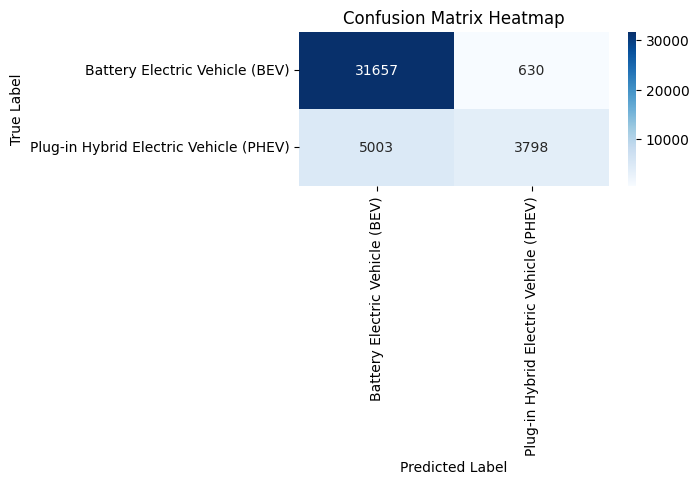

In [29]:
# Call the function to plot confusion matrix
plot_confusion_matrix(conf_matrix, target_encoder.classes_)

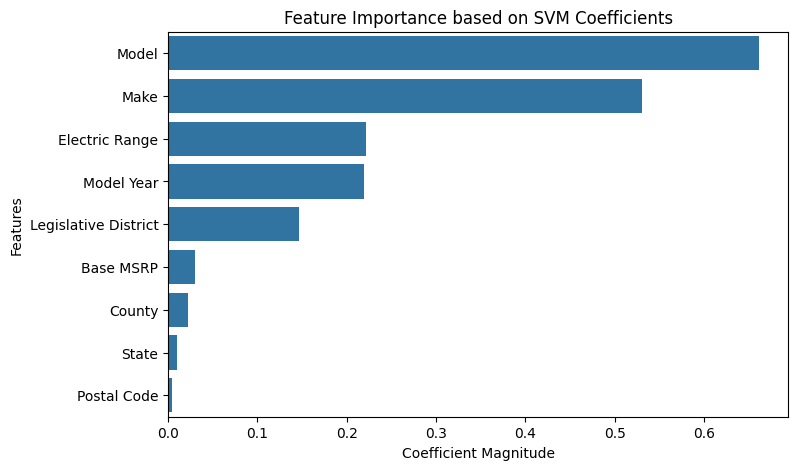

In [21]:
# 2. Feature Importance (for linear SVMs)
if svm_model.kernel == 'linear':
    feature_importance = pd.Series(svm_model.coef_[0], index=X.columns)
    feature_importance = feature_importance.abs().sort_values(ascending=False)

    # Plot feature importance
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title('Feature Importance based on SVM Coefficients')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Features')
    plt.show()
else:
    print("Feature importance can only be visualized for linear SVM models.")

Explanation:

1. Confusion Matrix Heatmap : The function plot_confusion_matrix generates a heatmap to show how many instances were correctly or incorrectly classified by the model.
Darker diagonal values indicate correct classifications, while off-diagonal values show misclassifications.
Support Vector Decision Boundaries:

2. For linear SVMs, the coef_ attribute can indicate the importance of each feature.
The bar plot shows the magnitude of coefficients, giving a sense of which features the model is most sensitive to. This helps in understanding what features contribute most to the predictions.

## Model Performance Summary:

 Accuracy : The model achieved an overall accuracy of 86.29%. This indicates that the model correctly predicted the type of electric vehicle in approximately 86% of the cases.


Confusion Matrix Analysis:

True Positives (BEV): 31,657 correctly classified as Battery Electric Vehicles (BEVs).
False Positives (BEV): 630 instances were incorrectly classified as BEVs but were actually Plug-in Hybrid Electric Vehicles (PHEVs).
True Negatives (PHEV): 3,798 correctly classified as PHEVs.
False Negatives (PHEV): 5,003 instances were incorrectly classified as PHEVs but were actually BEVs.

The confusion matrix shows that the model performs well in identifying BEVs, but struggles with accurately predicting PHEVs.


Precision, Recall, and F1-Score:

### Battery Electric Vehicle (BEV):

Precision: 0.86 - Out of all the vehicles predicted as BEVs, 86% were correctly identified.

Recall: 0.98 - The model correctly identified 98% of actual BEVs.

F1-Score: 0.92 - This high score indicates a balanced performance between precision and recall for BEVs.

### Plug-in Hybrid Electric Vehicle (PHEV):

Precision: 0.86 - Out of all the vehicles predicted as PHEVs, 86% were correctly identified.

Recall: 0.43 - The model only captured 43% of the actual PHEVs, indicating it missed a significant portion of them.

F1-Score: 0.57 - The lower score suggests that the model struggles with correctly identifying PHEVs.

Macro Average:

Precision: 0.86, Recall: 0.71, F1-Score: 0.75 - These scores show an overall view of the model's performance, highlighting that recall is lower across both classes, which might be due to the imbalance in the data (more BEVs than PHEVs).
Weighted Average:

Precision: 0.86, Recall: 0.86, F1-Score: 0.84 - Since the dataset has more BEVs, the weighted average skews towards the performance on BEVs, explaining why these scores are higher.

### Conclusion:

The SVM model performs well in predicting Battery Electric Vehicles (BEVs), as seen by the high precision and recall. However, it has difficulty with Plug-in Hybrid Electric Vehicles (PHEVs), shown by the significantly lower recall. This may suggest an imbalance in the dataset, where the model has more data to learn patterns for BEVs than PHEVs. It could also imply that the features selected do not distinguish PHEVs as clearly, or that additional feature engineering might be required.

Recommendations for Improvement:

Address Imbalance: Consider oversampling the PHEV data (e.g., SMOTE) or undersampling the BEV data to balance the dataset.

Use class weighting in the SVM model to penalize misclassification of PHEVs more heavily.

Feature Engineering: Explore additional features or combinations of features that might better distinguish between BEVs and PHEVs.
For example, adding interaction terms or extracting more detailed features from the data (e.g., power, efficiency).

Parameter Tuning: Consider exploring different kernels (e.g., 'rbf', 'poly') to capture more complex relationships.
Perform hyperparameter tuning (e.g., grid search) to find the best values for C, gamma, and kernel parameters.

By implementing these recommendations, the model may become more robust in identifying both types of electric vehicles accurately.